<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [160]:
#Data Science - Joseph Roeges
#3/4/19

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# This allows plots to appear directly in the notebook.
%matplotlib inline
plt.style.use('fivethirtyeight') 
import csv
from collections import namedtuple   # Convenient to store the data rows

IMDB = '~/Downloads/title.ratings.tsv.gz'

In [2]:
#I am reading the .tsv file through the pd.read_csv so I can work with the database in python.
IMDB_new = pd.read_csv('~/Downloads/title.ratings.tsv.gz',delimiter='\t',encoding='utf-8')

In [3]:
#I am reviewing the first five entries to get a feel for the data. I can tell that the data needs to be cleaned.
IMDB_new.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1477
1,tt0000002,6.4,176
2,tt0000003,6.6,1106
3,tt0000004,6.4,107
4,tt0000005,6.2,1812


In [164]:
#This shows me the number of rows and columns, not including the original index. 
#This shows that there are 4,622 entries and 5 descriptors associated with those entries (at most).
file_nested_list.shape

(4622, 5)

In [165]:
file_nested_list.rename(columns={'item_name':'item','item_price':'price','choice_description':'description'}, inplace = True)
file_nested_list.head()
#I am changing the column names to decrease the amount of typing. We can see the header(columns) and the cells of the first 5 rows.

,order_id,quantity,item,description,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [166]:
file_nested_list['item'].value_counts().head()
#This shows the frequency of each item as part of the list of 4,622 entries while only listing the top five.

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item, dtype: int64

In [167]:
file_nested_list.isnull().sum()
#We have values for all of our variables except for the 1,246 entries that do not have an item description.

order_id          0
quantity          0
item              0
description    1246
price             0
dtype: int64

In [168]:
file_nested_list.columns
#This is a list of all of the columns for our dataframe.

Index(['order_id', 'quantity', 'item', 'description', 'price'], dtype='object')

# Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [169]:
file_nested_list.describe()
#Since the order_id counts up per order, there is a maximum of 1,834 orders. 
#The largest number of items for one entree is 15.
#The quantity column is irrelevant to the average price of an order as the price includes the total price for more than one item.

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [170]:
file_nested_list['order_id'].nunique()
# This means that there are 1,834 unique order numbers that are not left as null. 
# We cannot assume that the maximum value is the same as this answer.

1834

In [171]:
file_nested_list['order_id'].value_counts().head()
#This shows that one order has 23 entrees attached to it.

926     23
1483    14
205     12
691     11
1786    11
Name: order_id, dtype: int64

In [172]:
file_nested_list.price = [x.strip('$' or ' ') for x in file_nested_list.price]
file_nested_list.price = [float(x) for x in file_nested_list.price]
#I changed took off the $ and any space(s) from the character values in the price so they would be quantitative data. 
#Prices will now be floating points.

In [173]:
file_nested_list.describe()
# This shows that the prices are now quantitative since the data is included below.
# The most expensive entry was $44.25, but we do not know the item or the quantity of the item.

,order_id,quantity,price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [174]:
file_nested_list.head()
#This shows that the '$' symbol has been removed from prices.  

,order_id,quantity,item,description,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [175]:
average_meal_price = file_nested_list['price'].sum() / file_nested_list['order_id'].nunique()
#I want to take the sum of all of the items' prices and divide by the number of orders to find an average per meal.
#I need to take the number of unique order numbers in 'order_id'.
#I cannot use the count of the 'order_id' as this will just count each entree.
#The average meal price = $18.81 

print('The average meal price is $' +  str(average_meal_price))

The average meal price is $18.811428571428575


In [176]:
file_nested_list['description'].count()
#This includes the number of entrees that have an ingredient description.

3376

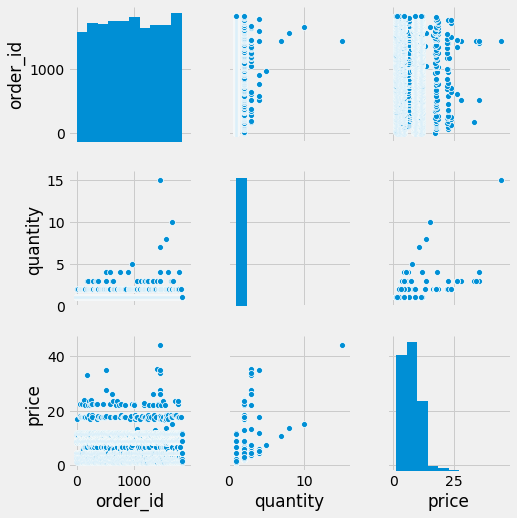

In [177]:
sns.pairplot(file_nested_list)
#I have a created scatter plots to see if there is any correlation between the values. 

In [178]:
file_nested_list.corr()
#The number confirm that there is no strong correction between two quantitative factors. 
#Quantity and Price is the strongest correction at .264.

,order_id,quantity,price
order_id,1.000000,0.032397,-0.001618
quantity,0.032397,1.000000,0.263981
price,-0.001618,0.263981,1.000000


### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

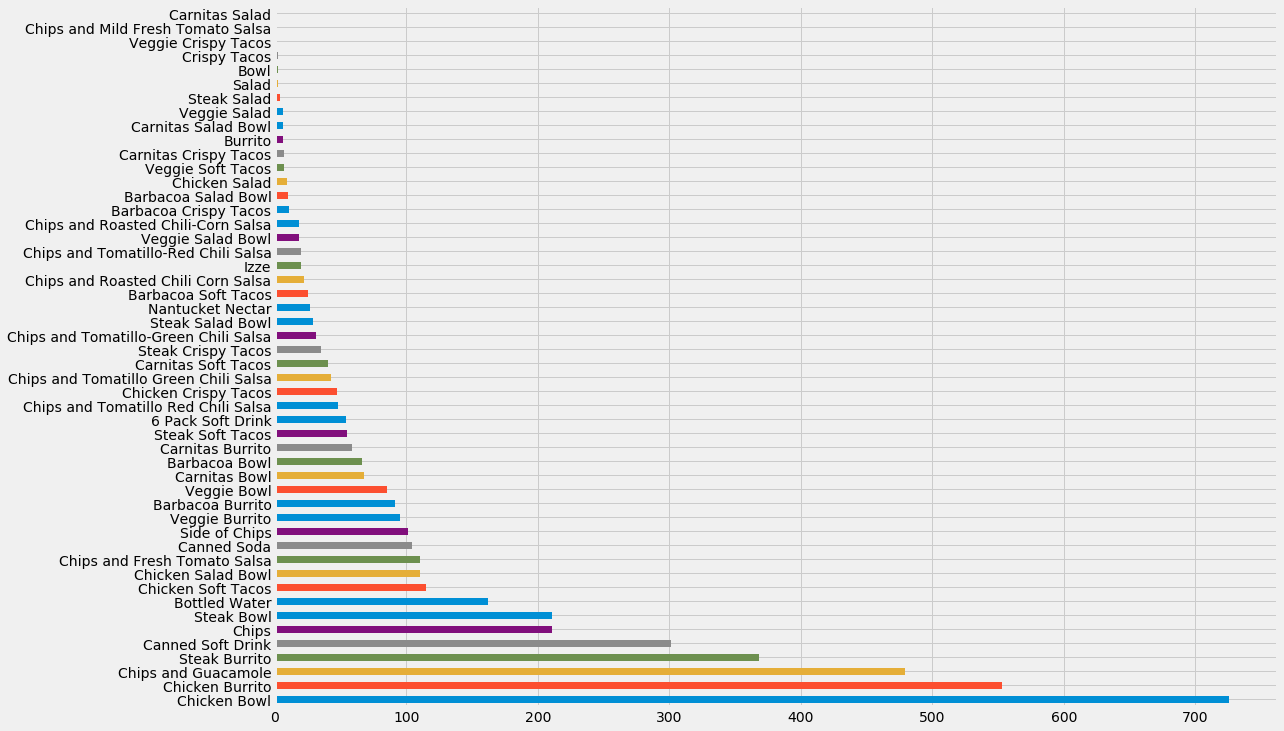

In [181]:
file_nested_list.item.value_counts().plot(kind='barh', figsize = (16,12))
# This horizontal bar graph shows all values for item. I can view all of the options available. 

In [194]:
unique_sodas = file_nested_list[(file_nested_list['item'] == 'Canned Soda') | (file_nested_list['item'] == 'Canned Soft Drink')]
unique_sodas.head()
# I have created a new list for items that are either listed as 'Canned Soda' or 'Canned Soft Drink'

,order_id,quantity,item,description,price
18,9,2,Canned Soda,[Sprite],2.18
28,14,1,Canned Soda,[Dr. Pepper],1.09
51,23,2,Canned Soda,[Mountain Dew],2.18
53,24,1,Canned Soda,[Sprite],1.09
107,47,1,Canned Soda,[Dr. Pepper],1.09


In [200]:
unique_sodas['description'].unique()
#This list shows the unique soda options. However, each item is its own list. Let's change that.

array(['[Sprite]', '[Dr. Pepper]', '[Mountain Dew]', '[Diet Dr. Pepper]',
       '[Coca Cola]', '[Diet Coke]', '[Coke]', '[Lemonade]', '[Nestea]'],
      dtype=object)

In [202]:
unique_sodas.description = [x.strip('[' and ']') for x in unique_sodas.description]
unique_sodas['description'].unique()

array(['Sprite', 'Dr. Pepper', 'Mountain Dew', 'Diet Dr. Pepper',
       'Coca Cola', 'Diet Coke', 'Coke', 'Lemonade', 'Nestea'],
      dtype=object)

In [203]:
unique_sodas['description'].value_counts()
#We can see, in descending order, the value count for each unique soda. Also, the extra characters, '[' and ']' are gone.

Diet Coke          110
Coke               102
Sprite              72
Lemonade            31
Coca Cola           26
Nestea              18
Dr. Pepper          18
Mountain Dew        15
Diet Dr. Pepper     13
Name: description, dtype: int64

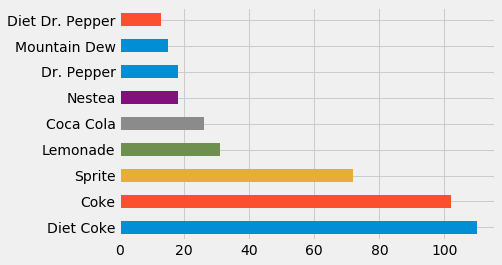

In [205]:
unique_sodas.description.value_counts().plot(kind='barh');
#We have a better representation of the numbers per soda.

---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [224]:
burrito_list = file_nested_list[file_nested_list['item'].str.contains('Burrito', na=False)]
burrito_list.item.unique()
#I have created a list for all items that have 'Burrito' in the name.

array(['Steak Burrito', 'Chicken Burrito', 'Barbacoa Burrito',
       'Carnitas Burrito', 'Veggie Burrito', 'Burrito'], dtype=object)

In [228]:
burrito_list.item.value_counts()
# This is the number of burrito entries per type of burrito.
#The instructions ask us to ignore the quantity column for this example.

Chicken Burrito     553
Steak Burrito       368
Veggie Burrito       95
Barbacoa Burrito     91
Carnitas Burrito     59
Burrito               6
Name: item, dtype: int64

In [229]:
#I would next create a new list with the integer number of toppings per burrito. I would first have to clean the topping list.

### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!
